In [1]:
from GSS_tools import *
import xarray as xr
import numpy as np
from helpers import *

In [2]:
# Total number of sequences generated:

# Sequence length:
m_list= [1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [3]:
# Load datasets 
ds_stat = xr.load_dataset("/Users/PARKJIHYEON/phys763/qolab-start/data/2025-12-14/#m1000_k1000/ds_stat.h5")
ds_seq  = xr.load_dataset("/Users/PARKJIHYEON/phys763/qolab-start/data/2025-12-14/#m1000_k1000/ds_seq.h5")

In [4]:
# Convert datasets
da = ds_stat["state_raw_q"]
a = da.sel(qubit="q4").values        # shape (num_sequences, num_depths)
S_tot = np.shape(a)[0]

a_T = a.T
print(np.shape(a_T))
da2 = ds_seq["sequence_q"]
b = da2.sel(qubit="q4").values        # shape (num_sequences, num_depths)

(11, 1000)


In [5]:
# Case 3 : Real circuit
results_bit_real = a_T
results_seq_real = b_to_depth_seq_dicts_unitaries(b, m_list, U_clifford)

100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 1104636.29it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 81852.86it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 44955.51it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 31332.11it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 18800.53it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 15624.10it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 12819.56it/s]

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 11410.99it/s]

100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 18.02it/s]


In [6]:
print(results_bit_real[0])

[0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 

In [7]:
### Estimator built directly from the mean sample:

## Case 3: real
k_list_real = []
for i,m in enumerate(m_list):
    k = k_estimator_mean(results_seq_real[i],results_bit_real[i],S_tot)
    k_list_real.append(k)

k_real_mean = np.array(k_list_real).real
k_real_mean_norm = np.array(k_list_real).real/np.array(k_list_real).real[0]

# Estimator built from the median-of-means:
k_list_real_mom = []
for i,m in enumerate(m_list):
    k = np.median(k_estimator_mom(results_seq_real[i],results_bit_real[i],S_tot,1000))
    k_list_real_mom.append(k)

k_real_mom = np.array(k_list_real_mom).real
k_real_mom_norm = np.array(k_list_real_mom).real/np.array(k_list_real_mom).real[0]

  0%|                                                     | 0/1 [00:00<?, ?it/s]IOStream.flush timed out
IOStream.flush timed out
100%|█████████████████████████████████████████████| 1/1 [00:56<00:00, 56.26s/it]


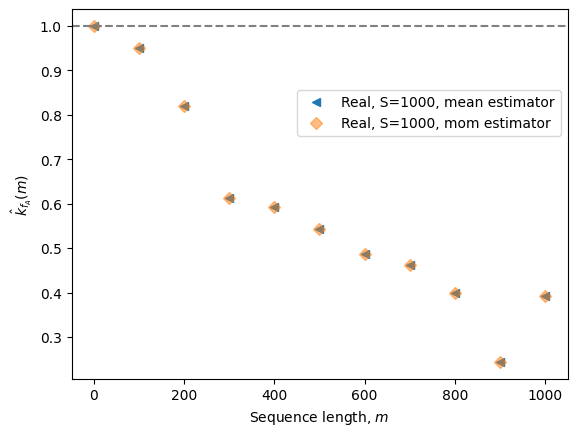

In [14]:
# Ploting the sequence estimators for 1000 samples:

#plt.plot(m_list,np.array(k_noiseless_mean_norm).real,'.',label=f'Noiseless, S={S_tot}, mean estimator')
#plt.plot(m_list,np.array(k_noiseless_mom_norm).real,'p',label=f'Noiseless, S={S_tot}, mom estimator',alpha=0.5)

plt.plot(m_list,np.array(k_real_mean_norm).real,'<',label=f'Real, S={S_tot}, mean estimator')
plt.plot(m_list,np.array(k_real_mom_norm).real,'D',label=f'Real, S={S_tot}, mom estimator',alpha=0.5)
plt.axhline(1.0,ls='--',c='grey')
#plt.ylim([0,1])
plt.xlabel('Sequence length, $m$')
plt.ylabel(r'$\hat{k}_{f_A}(m)$')
plt.legend(bbox_to_anchor=(1.0,0.8));

In [15]:
print(np.array(k_real_mean))

[0.1005 0.0955 0.0825 0.0615 0.0595 0.0545 0.049  0.0465 0.04   0.0245
 0.0395]


In [16]:
m_data= np.array(m_list)

ydata3 = k_real_mean_norm
popt3, pcov3 = curve_fit(model_fit, m_data, ydata3, bounds=(0, [1., 1.]))

ydata4 = k_real_mom_norm
popt4, pcov4 = curve_fit(model_fit, m_data, ydata4, bounds=(0, [1., 1.]))

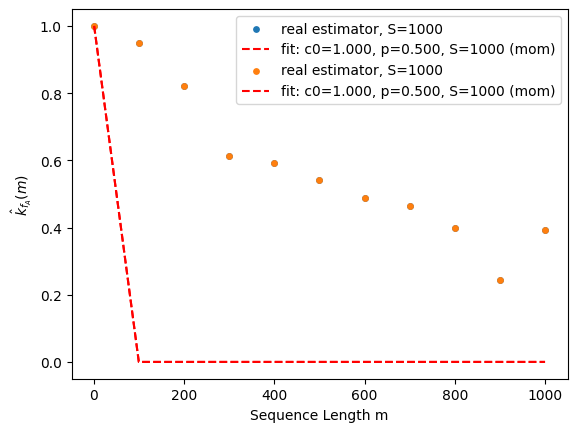

In [17]:

plt.scatter(m_data,ydata3,label='real estimator, S=1000',s=15);
plt.plot(m_data,model_fit(m_data, *popt3), 'r--',
        label='fit: c0=%5.3f, p=%5.3f, S=1000 (mom)' % tuple(popt3))
plt.scatter(m_data,ydata4,label='real estimator, S=1000',s=15);
plt.plot(m_data,model_fit(m_data, *popt4), 'r--',
        label='fit: c0=%5.3f, p=%5.3f, S=1000 (mom)' % tuple(popt4))
plt.xlabel('Sequence Length m'); plt.ylabel(r'$\hat{k}_{f_A}(m)$');
plt.legend();

In [18]:
r3=0.5*(1.0-popt3[1])
print("error rate(real-mean): ",r3)

r4=0.5*(1.0-popt4[1])
print("error rate(real-mom): ",r4)

error rate(real-mean):  0.25
error rate(real-mom):  0.25


log-fit estimates: c0=0.988955, p=0.998815


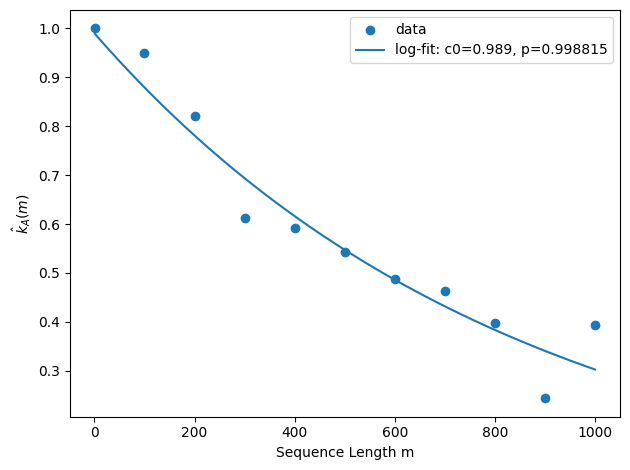

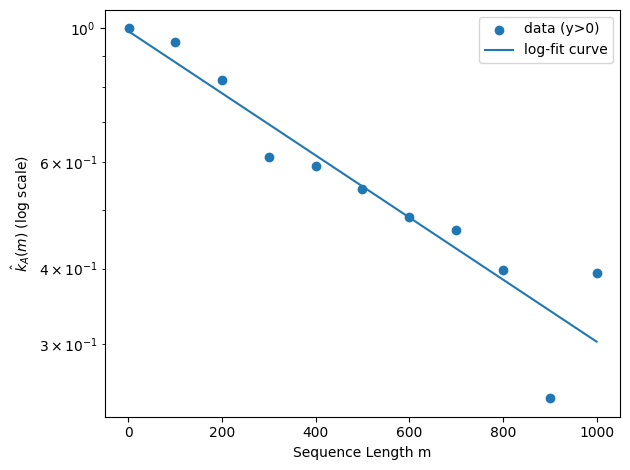

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- model ---
def model_fit(m, c0, p):
    return c0 * (p ** (m - 1.0))

# --- your data ---
m_data = np.array(m_data, dtype=float)      # x-axis
y_data = np.array(k_real_mean_norm, dtype=float)  # y-axis

# 1) mask: log 가능한 점만 사용
mask = y_data > 0
m_fit = m_data[mask]
y_fit = y_data[mask]

# 2) log-linear regression: log y = log c0 + (m-1) log p
x = (m_fit - 1.0)
logy = np.log(y_fit)

# 선형회귀: logy = a + b*x  (a=log c0, b=log p)
b, a = np.polyfit(x, logy, 1)
p_hat  = np.exp(b)
c0_hat = np.exp(a)

print(f"log-fit estimates: c0={c0_hat:.6g}, p={p_hat:.6g}")

# 3) fitted curve for plotting (전체 m 구간)
m_grid = np.linspace(m_data.min(), m_data.max(), 400)
y_pred = model_fit(m_grid, c0_hat, p_hat)

# --- Plot 1: linear y-scale ---
plt.figure()
plt.scatter(m_data, y_data, label="data")
plt.plot(m_grid, y_pred, label=f"log-fit: c0={c0_hat:.3g}, p={p_hat:.6f}")
plt.xlabel("Sequence Length m")
plt.ylabel(r"$\hat{k}_A(m)$")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: semi-log (y axis log) ---
plt.figure()
plt.scatter(m_fit, y_fit, label="data (y>0)")
plt.plot(m_grid, y_pred, label="log-fit curve")
plt.yscale("log")
plt.xlabel("Sequence Length m")
plt.ylabel(r"$\hat{k}_A(m)$ (log scale)")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
print("x axis\n")
print(m_list)
print("y data")
print(np.array(k_real_mean_norm))

x axis

[1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y data
[1.         0.95024876 0.82089552 0.6119403  0.5920398  0.54228856
 0.48756219 0.46268657 0.39800995 0.24378109 0.39303483]
